# TASK 4 - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.
Author - Neha Bansode

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ['ID', 'entity', 'sentiment', 'comment']
df = pd.read_csv('twitter_training.csv', header=0, names=column_names)

In [4]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.shape

(74681, 4)

In [6]:
df.columns

Index(['ID', 'entity', 'sentiment', 'comment'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   comment    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
entity_count = df['entity'].value_counts()
print(entity_count)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

# Checking for Duplicates

In [9]:
counts = df.groupby(list(df.columns)).size()
duplicated_rows = df[df.groupby(list(df.columns)).ngroup().isin(counts[counts > 1].index)]
duplicated_rows_count = duplicated_rows.shape[0]
print(duplicated_rows)
print("Count of duplicated rows:", duplicated_rows_count)

Empty DataFrame
Columns: [ID, entity, sentiment, comment]
Index: []
Count of duplicated rows: 0


In [10]:
print(df.duplicated().sum())

2700


In [11]:
df.drop_duplicates(inplace=True)

# Handling Missing Values

ID             0
entity         0
sentiment      0
comment      326
dtype: int64
         ID       entity sentiment comment
60     2411  Borderlands   Neutral     NaN
552    2496  Borderlands   Neutral     NaN
588    2503  Borderlands   Neutral     NaN
744    2532  Borderlands  Positive     NaN
1104   2595  Borderlands  Positive     NaN
...     ...          ...       ...     ...
73656  9019       Nvidia  Positive     NaN
73760  9036       Nvidia  Negative     NaN
73854  9053       Nvidia  Positive     NaN
73970  9073       Nvidia  Positive     NaN
74420  9154       Nvidia  Positive     NaN

[326 rows x 4 columns]


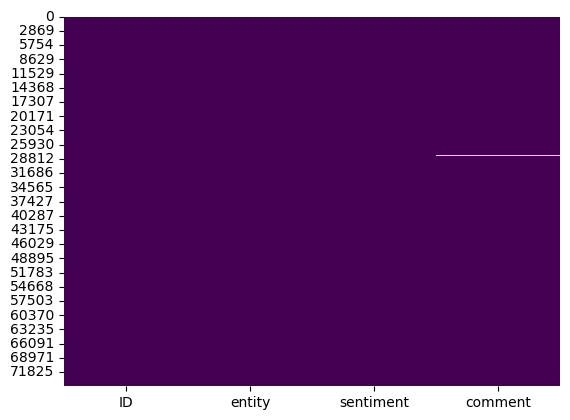

In [12]:
print(df.isnull().sum())

print(df[df.isnull().any(axis=1)])

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [13]:
df.nunique()

ID           12447
entity          32
sentiment        4
comment      69490
dtype: int64

In [14]:
for i in range(5):
    print(f"{i+1}: {df['comment'][i]}   ->   {df['sentiment'][i]}")

1: I am coming to the borders and I will kill you all,   ->   Positive
2: im getting on borderlands and i will kill you all,   ->   Positive
3: im coming on borderlands and i will murder you all,   ->   Positive
4: im getting on borderlands 2 and i will murder you me all,   ->   Positive
5: im getting into borderlands and i can murder you all,   ->   Positive


# Sentiment Analysis

In [15]:
df['sentiment'].value_counts()

sentiment
Negative      21787
Positive      19810
Neutral       17800
Irrelevant    12584
Name: count, dtype: int64

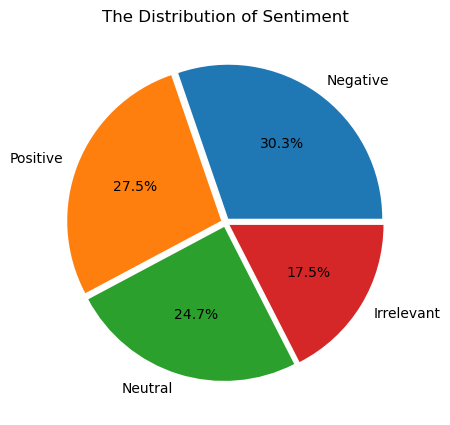

In [16]:
# Calculate sentiment counts
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Create pie chart
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%.1f%%', explode=[0.03] * len(labels))
plt.title('The Distribution of Sentiment')
plt.show()

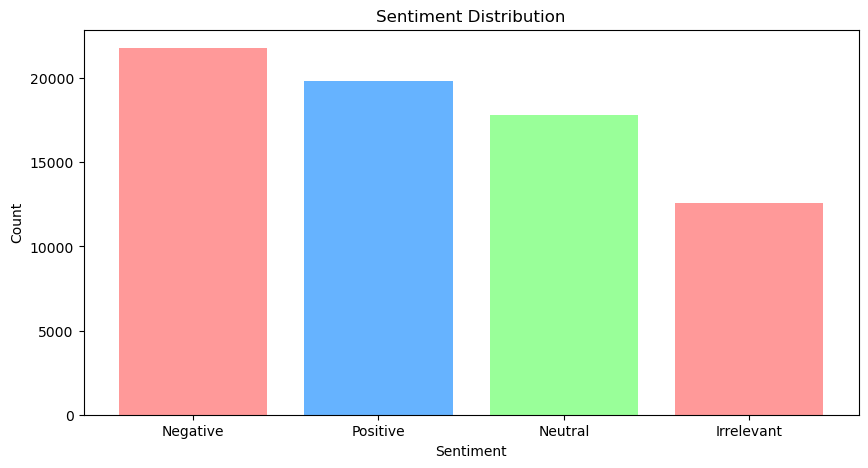

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

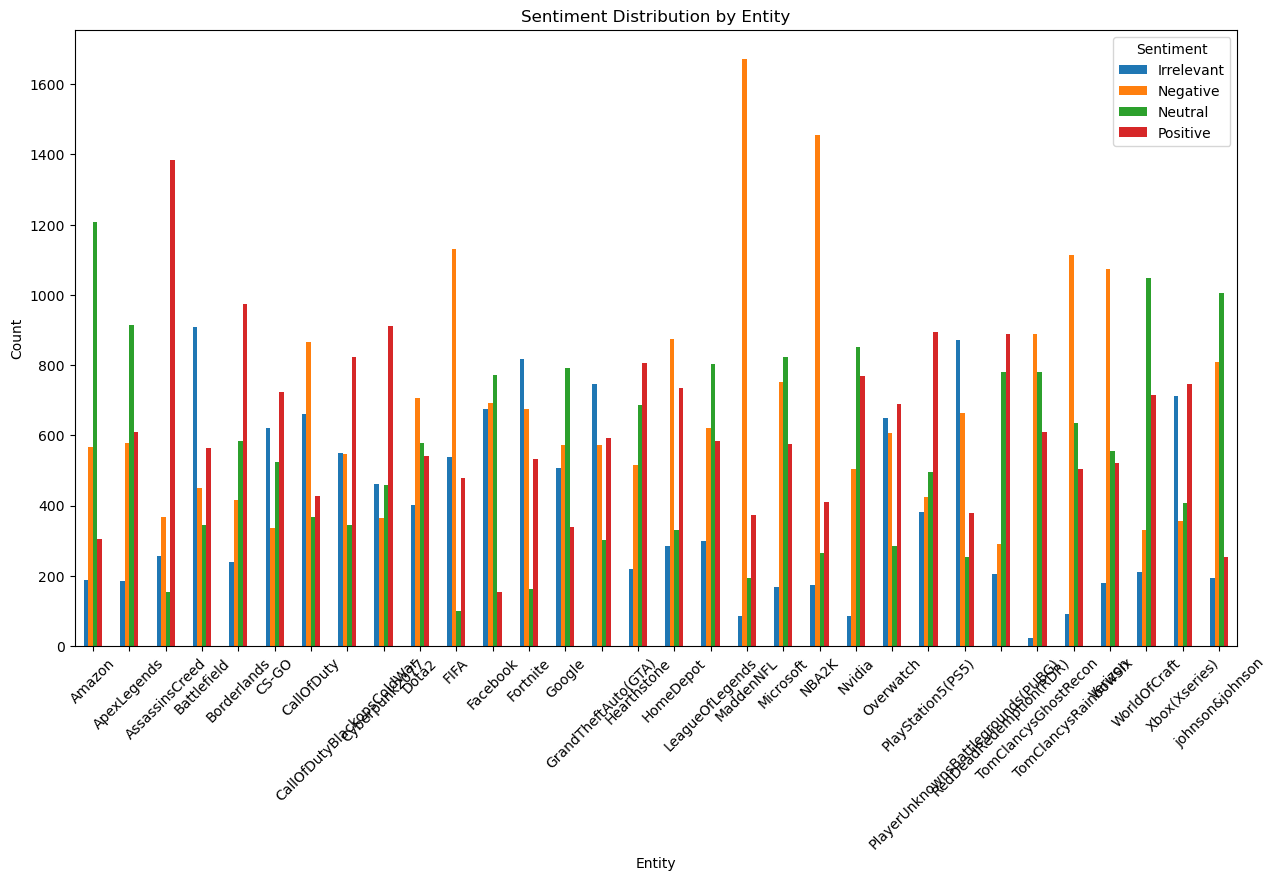

In [18]:
counts = df.groupby(['entity', 'sentiment']).size().unstack()
counts.plot(kind='bar', figsize=(15, 8))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Sentiment')
plt.show()

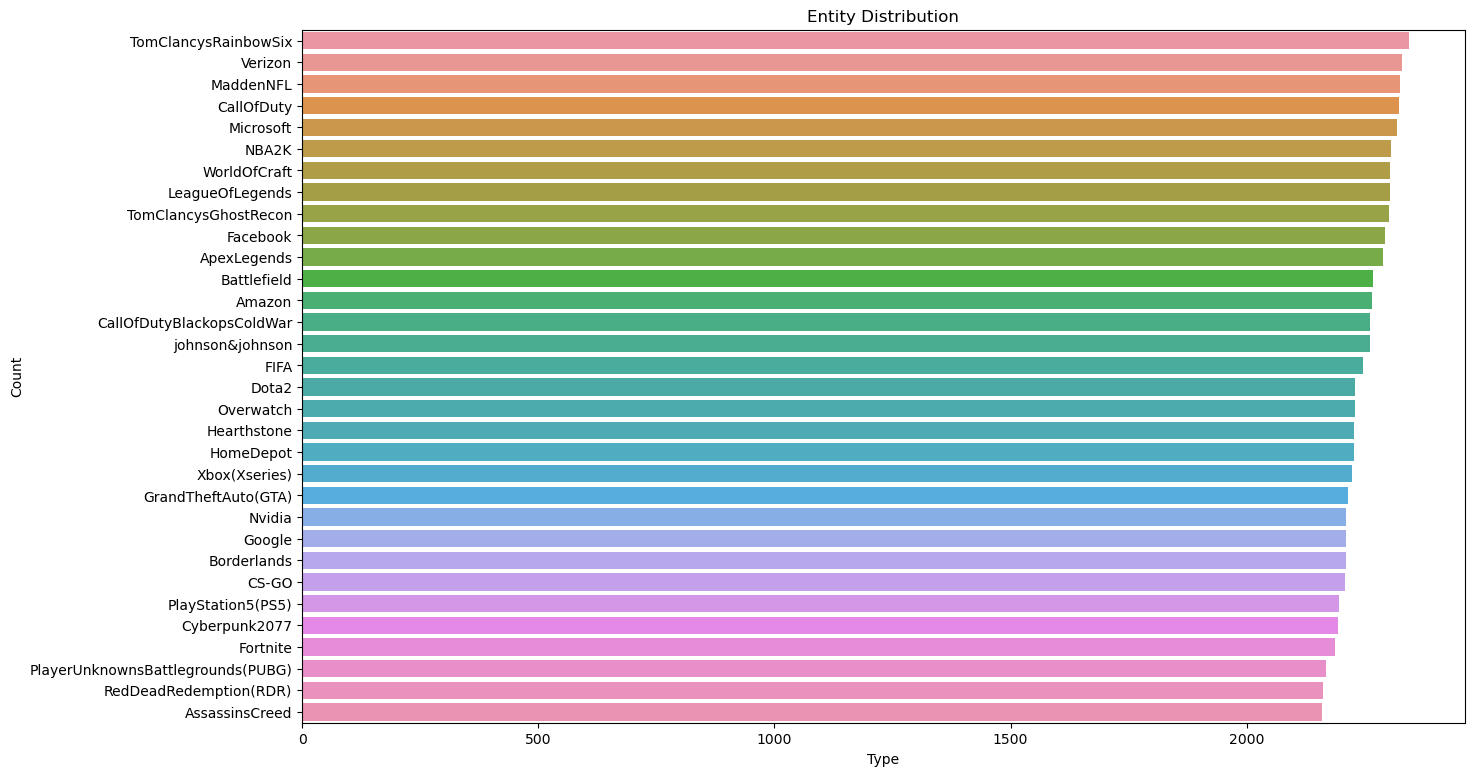

In [19]:
plt.figure(figsize=(15,9))
sns.barplot(x=df['entity'].value_counts().values,y=df['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

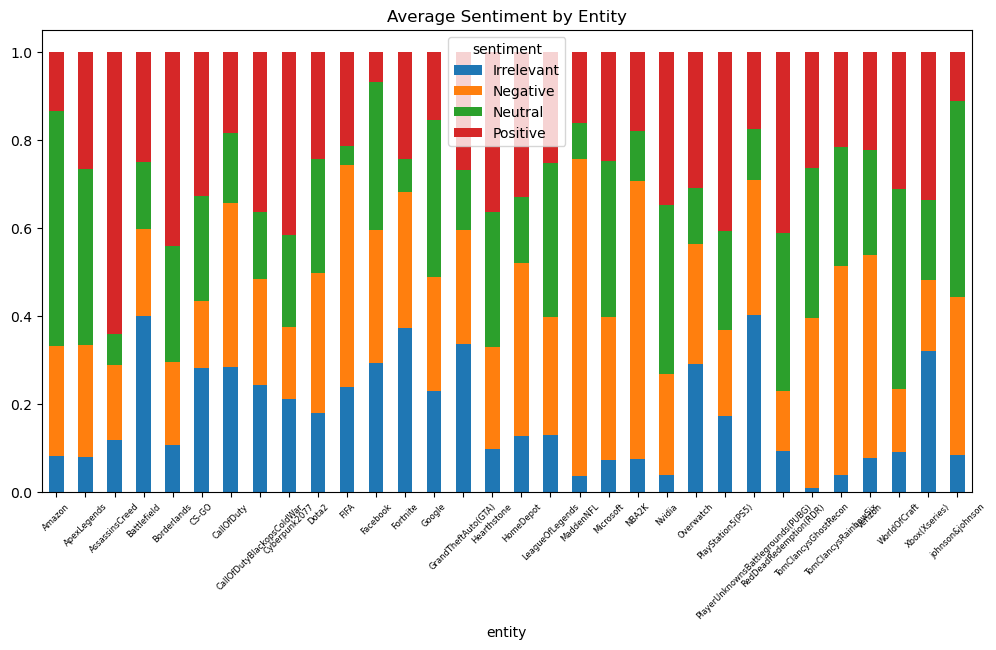

In [20]:
average_sentiment_by_entity = df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()

average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()

In [24]:
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stemmer = PorterStemmer()
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [27]:
df["comment"] = df["comment"].apply(clean)

In [28]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [29]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

# Positive Sentiment Word Cloud

In [30]:
from PIL import Image, ImageDraw, ImageFont

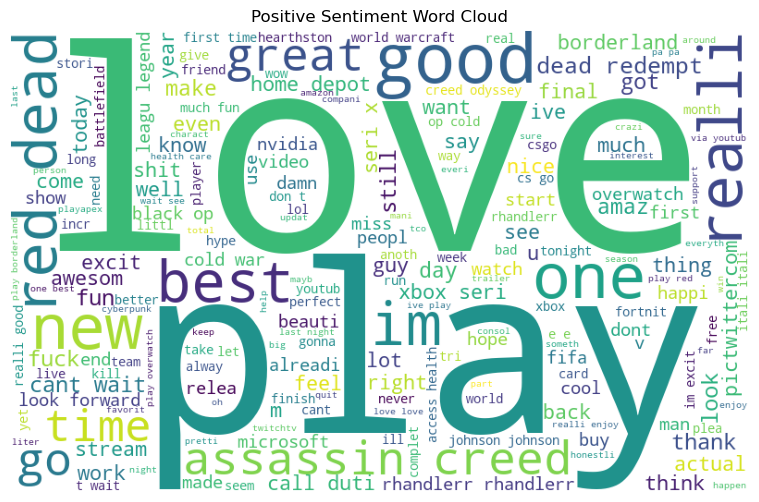

In [31]:
positive_data = df[df['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

# Negative Sentiment Word Cloud

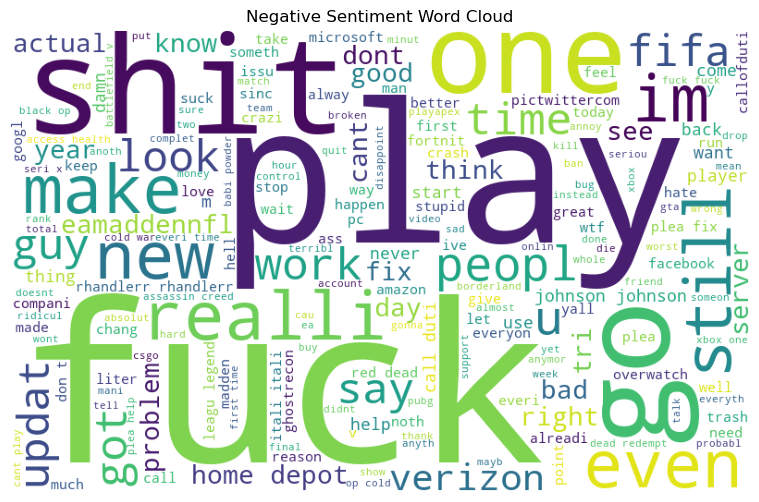

In [33]:
negative_data = df[df['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

# Neutral Sentiment Word Cloud

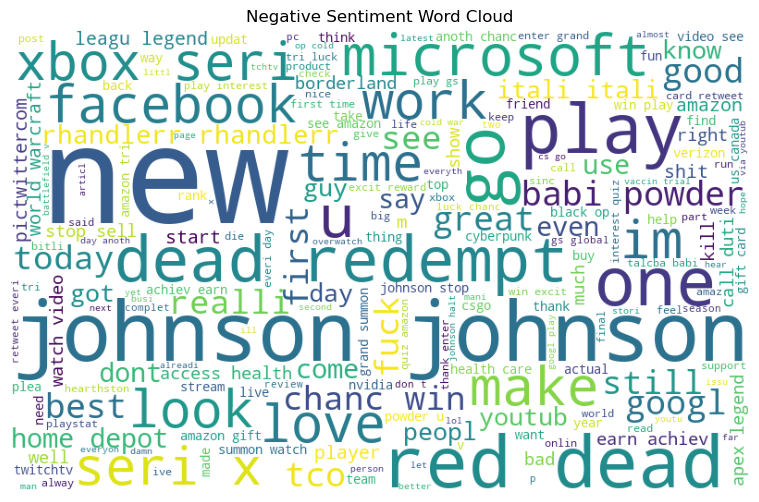

In [34]:
neutral_data = df[df['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

# Irrelevant Sentiment Word Cloud

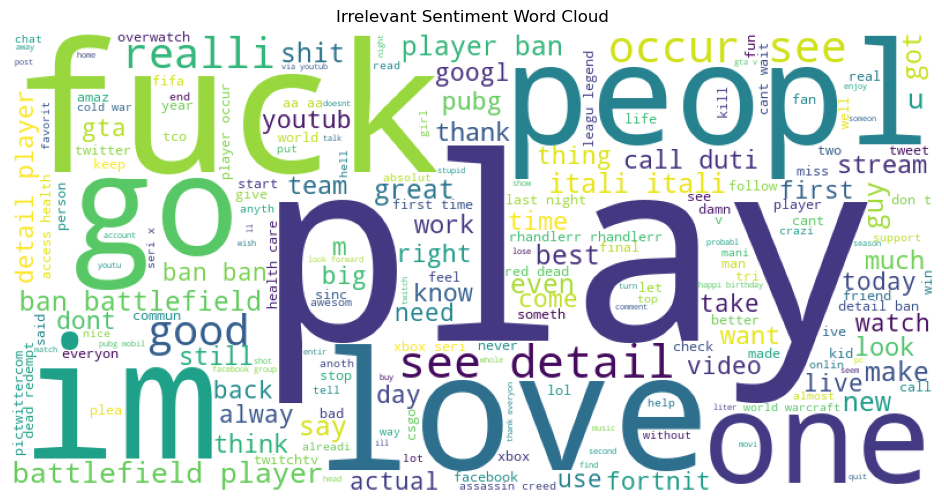

In [35]:
irrelevant_data = df[df['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")